In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mX = [
        [
            [10, 2, -6],
            [-1, 4, 2],
            [2, 3, 6]
        ],
        [
            [-5, 2, -8],
            [4, -3, -9],
            [-8, -10, 9]
        ],
        [
            [10, -5, 3, 0],
            [3, -9, 2, -2],
            [-8, 0, 17, -4],
            [3, -3, -8, -15]
        ],
]

mY = [
    [17, -4, -12],
    [13, -7, -2],
    [9, 10, -10, -18]
]


In [15]:
def checkDiagonally(x):
    x = np.array(x)
    diag = np.diag(np.abs(x))
    off_diag = np.sum(np.abs(x), axis=1) - diag
#     for i in range(len(x)):
#         print("Diagonal", i+1, "=", diag[i])
#         print("Total Not Diagonal Value = ", end=" ")
#         sudahPrint = 0
#         for j, el in enumerate(x[i]):
#             if j != i:
#                 if sudahPrint != 0:
#                     print("+", end=" ")
#                 print(f"|{el}|", end=" ")
#                 sudahPrint += 1
#         print(f"= {off_diag[i]}")
#         if(diag[i] >= off_diag[i]):
#             print(diag[i], ">=", off_diag[i])
#         else:
#             print(diag[i], "<", off_diag[i])
#             print("The Equation is not Diagonally Dominant")
#             return False
            
    if np.all(diag > off_diag):
#         print("This Equation is diagonally dominant!")
        return True
    else:
        return False
    
    
def gaussSeidel(x, y, epsilon, max):
    x = np.array(x)
    y = np.array(y)
    
    diag = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)
    xBefore = np.zeros(x.shape[0])
    
    for i in range(max):
        xNew = np.array(xBefore)
        for j, row in enumerate(x):
            xNew[j] = (y[j] + np.dot(row, xNew)) / diag[j]
        
        #euclidean distance
        distance = np.sqrt(np.dot(xNew - xBefore, xNew - xBefore))
        
        if distance < epsilon:
            print(xNew)
            return True
        
        xBefore = xNew
    return False


for i, (x, y) in enumerate(zip(mX, mY)):
#     print("Equation ", i+1, " Array X:")
#     checkDiagonally(x)
#     print("------------------")
    if checkDiagonally(x):
        print("test")
        gaussSeidel(x, y, 0.01456, 10)
        
    
    

test
[ 0.34010322  0.1875559  -2.20714569]
test
[ 0.22810089 -1.4116141  -0.10787767  1.58547776]


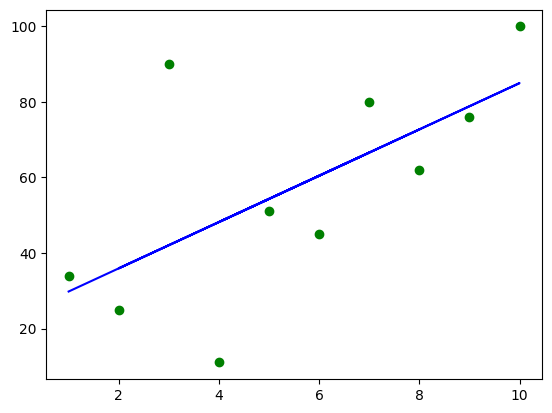

In [5]:
lx = [1, 5, 7, 2, 3, 9, 10, 4, 6, 8]
ly = [34, 51, 80, 25, 90, 76, 100, 11, 45, 62]

lx = np.array(lx)
ly = np.array(ly)

A = np.vstack([lx, np.ones(len(ly))]).T #.T agar vertikal(transpose)
Y = np.vstack(ly)

#beta = (AT . A)^-1 . AT.Y 
beta = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), Y)
# [[ 6.13333333] --> m
#  [23.66666667]] --> c
# print(beta)
m = beta[0]
c = beta[1]

#y = mx + c
y = m*lx + c

plt.plot(lx, ly, 'go')
plt.plot(lx, y, 'b-')
plt.show()

In [31]:
from sympy import *

x = symbols('x') #redefine x, karena menumpuk x yang di atas
f1 = lambda x: 7*x**4 - 3*x**2 + x
df1 = diff(f1(x), x)
df1 = lambdify(x, df1, 'numpy')

f2 = lambda x: 8*x**6 + 5*x**4 - 2
df2 = diff(f2(x), x)
df2 = lambdify(x, df2, 'numpy')

def newton_raphson(f, df, x0, tolerance, max):
    if max == 0:
        print("Max iteration reach!")
        return False
    if np.abs(f(x0)) < tolerance:
        print(x0)
        return True
    else:
        xNew = x0 - (f(x0)/df(x0))
        return newton_raphson(f, df, xNew, tolerance, max-1)
    
newton_raphson(f1, df1, 1, 0.006541, 5)
newton_raphson(f2, df2, 1, 0.006541, 5)

Max iteration reach!
0.6903195287760319


True

In [3]:
import numpy as np

def f(x):
    return 3*x**4 -7*x**2 + 5

a = -4
b = 3
n = 30

boxWidth = (b-a)/(n-1)
print(boxWidth)

x = np.linspace(a, b, n)
# print(x)

# left riemann
xLeft = x[ :-1]
# print(xLeft)

yLeft = f(xLeft)
# print(yLeft)


leftRiemann = boxWidth * np.sum(np.abs(yLeft))
print("Left Riemann: ", leftRiemann)

#right riemann
xRight = x[1:]
# print(xRight)
yRight = f(xRight)

rightRiemann = boxWidth * np.sum(np.abs(yRight))
print("Right Riemann: ", rightRiemann)


#mid riemann
xMid = (xLeft + xRight)/2
# print(xMid)

yMid = f(xMid)
midRiemann = boxWidth * np.sum(np.abs(yMid))
print("Mid Riemann: ", midRiemann)

#trapezoid
trapezoid = np.sum(np.abs((yLeft + yRight)/2)) * boxWidth
print("Trapezoid: ", trapezoid)

0.2413793103448276
Left Riemann:  645.1387652149571
Right Riemann:  530.2422134908192
Mid Riemann:  580.4556464297783
Trapezoid:  587.690489352888
